In [4]:
import numpy as np

"""
    Minigratch Gradient Descent Function to train model
    1. Format the data
    2. call four_nn function to obtain losses
    3. Return all the weights/biases and a list of losses at each epoch
    Args:
        epoch (int) - number of iterations to run through neural net
        w1, w2, w3, w4, b1, b2, b3, b4 (numpy arrays) - starting weights
        x_train (np array) - (n,d) numpy array where d=number of features
        y_train (np array) - (n,) all the labels corresponding to x_train
        num_classes (int) - number of classes (range of y_train)
        shuffle (bool) - shuffle data at each epoch if True. Turn this off for testing.
    Returns:
        w1, w2, w3, w4, b1, b2, b3, b4 (numpy arrays) - resulting weights
        losses (list of ints) - each index should correspond to epoch number
            Note that len(losses) == epoch
    Hints:
        Should work for any number of features and classes
        Good idea to print the epoch number at each iteration for sanity checks!
        (Stdout print will not affect autograder as long as runtime is within limits)
"""
def minibatch_gd(epoch, w1, w2, w3, w4, b1, b2, b3, b4, x_train, y_train, num_classes, shuffle=True):
    batch_size = 200
    num_batches = int(len(x_train)/batch_size)
    losses = [0 for x in range(epoch)]

    for i in range(epoch):

        print("Epoch: ", i+1)
        loss = 0

        if (shuffle == True):
            idx = np.random.choice(len(x_train), len(x_train), False)
            x = x_train[idx]
            y = y_train[idx]

        else:
            x = x_train.copy()
            y = y_train.copy()

        for j in range(num_batches):
            x_test = x[j*batch_size : (j+1)*batch_size]
            y_test = y[j*batch_size : (j+1)*batch_size]
            loss += four_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, num_classes, False)
        
        losses[i] = loss
    
    return w1, w2, w3, w4, b1, b2, b3, b4, losses

"""
    Use the trained weights & biases to see how well the nn performs
        on the test data
    Args:
        All the weights/biases from minibatch_gd()
        x_test (np array) - (n', d) numpy array
        y_test (np array) - (n',) all the labels corresponding to x_test
        num_classes (int) - number of classes (range of y_test)
    Returns:
        avg_class_rate (float) - average classification rate
        class_rate_per_class (list of floats) - Classification Rate per class
            (index corresponding to class number)
    Hints:
        Good place to show your confusion matrix as well.
        The confusion matrix won't be autograded but necessary in report.
"""
def test_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, num_classes):
    class_rate_per_class = [0.0] * num_classes
    classifications = four_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, num_classes, True)
    avg_class_rate = np.sum(y_test == classifications)/len(y_test)

    for i in range(num_classes):
        class_rate_per_class[i] = np.sum(classifications[np.argwhere(y_test == i)] == i)/len(np.argwhere(y_test == i))

    return avg_class_rate, class_rate_per_class,classifications

"""
    4 Layer Neural Network
    Helper function for minibatch_gd
    Up to you on how to implement this, won't be unit tested
    Should call helper functions below
"""
def four_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, num_classes, test):
    Z1, acache1 = affine_forward(x_test, w1, b1)
    A1, rcache1 = relu_forward(Z1)
    Z2, acache2 = affine_forward(A1, w2, b2)
    A2, rcache2 = relu_forward(Z2)
    Z3, acache3 = affine_forward(A2, w2, b2)
    A3, rcache3 = relu_forward(Z3)
    F, acache4 = affine_forward(A3, w4, b4)

    if test:
        return np.argmax(F, axis=1)

    else:
        eta = 0.1
        loss, dF = cross_entropy(F, y_test)

        dA3, dW4, db4 = affine_backward(dF, acache4)
        dZ3 = relu_backward(dA3, rcache3)
        dA2, dW3, db3 = affine_backward(dZ3, acache3)
        dZ2 = relu_backward(dA2, rcache2)
        dA1, dW2, db2 = affine_backward(dZ2, acache2)
        dZ1 = relu_backward(dA1, rcache1)
        dX, dW1, db1 = affine_backward(dZ1, acache1)

        w1 -= eta*dW1
        w2 -= eta*dW2
        w3 -= eta*dW3
        w4 -= eta*dW4
        b1 -= eta*db1
        b2 -= eta*db2
        b3 -= eta*db3
        b4 -= eta*db4

        return loss

"""
    Next five functions will be used in four_nn() as helper functions.
    All these functions will be autograded, and a unit test script is provided as unit_test.py.
    The cache object format is up to you, we will only autograde the computed matrices.

    Args and Return values are specified in the MP docs
    Hint: Utilize numpy as much as possible for max efficiency.
        This is a great time to review on your linear algebra as well.
"""
def affine_forward(A, W, b):
    return np.matmul(A,W)+b, (A, W)

def affine_backward(dZ, cache):
    dA = np.matmul(dZ, cache[1].T)
    dW = np.matmul(cache[0].T, dZ)
    dB = np.sum(dZ, axis=0)
    return dA, dW, dB

def relu_forward(Z):
    A = Z.copy()
    A[A<0] = 0
    return A, Z

def relu_backward(dA, cache):
    dA[np.where(cache<0)] = 0
    return dA

def cross_entropy(F, y):
    loss = -(1/len(F))*np.sum(F[np.arange(len(F)), y.astype(int)] - np.log(np.sum(np.exp(F), axis=1)))
    class_label = np.zeros(F.shape)
    class_label[np.arange(len(F)), y.astype(int)] = 1  
    dF = -(1/len(F))*(class_label - np.exp(F) / (np.sum(np.exp(F), axis=1)).reshape((-1, 1)) )

    return loss, dF


In [5]:
from neural_network import minibatch_gd, test_nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import time

def init_weights(d, dp):
    return 0.01 * np.random.uniform(0.0, 1.0, (d, dp)), np.zeros(dp)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


if __name__ == '__main__':
    x_train = np.load("data/x_train.npy")
    x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
    y_train = np.load("data/y_train.npy")

    x_test = np.load("data/x_test.npy")
    x_test = (x_test - np.mean(x_test, axis=0))/np.std(x_test, axis=0)
    y_test = np.load("data/y_test.npy")

    load_weights = False #set to True if you want to use saved weights

    if load_weights:
        w1 = np.load('w1')
        w2 = np.load('w2')
        w3 = np.load('w3')
        w4 = np.load('w4')

        b1 = np.load('b1')
        b2 = np.load('b2')
        b3 = np.load('b3')
        b4 = np.load('b4')
    else:
        w1, b1 = init_weights(784, 256)
        w2, b2 = init_weights(256, 256)
        w3, b3 = init_weights(256, 256)
        w4, b4 = init_weights(256, 10)

    time_start=time.time()
    w1, w2, w3, w4, b1, b2, b3, b4, losses = minibatch_gd(30, w1, w2, w3, w4, b1, b2, b3, b4, x_train, y_train, 10)
    time_end=time.time()
    
    np.save('w1', w1)
    np.save('w2', w2)
    np.save('w3', w3)
    np.save('w4', w4)

    np.save('b1', b1)
    np.save('b2', b2)
    np.save('b3', b3)
    np.save('b4', b4)

    avg_class_rate, class_rate_per_class, y_pred = test_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, 10)

    print(avg_class_rate, class_rate_per_class)
    print('Time:', time_end-time_start,'s')

    class_names = np.array(["0","1","2","3","4","5","6","7","8","9"])

    plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
    plt.show()


Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
0.8869 [0.87, 0.978, 0.83, 0.913, 0.855, 0.923, 0.655, 0.909, 0.966, 0.97]
Time: 59.703603982925415 s
Normalized confusion matrix
[[0.87  0.004 0.018 0.025 0.002 0.    0.074 0.    0.006 0.001]
 [0.003 0.978 0.001 0.015 0.002 0.    0.001 0.    0.    0.   ]
 [0.021 0.001 0.83  0.007 0.1   0.    0.037 0.    0.004 0.   ]
 [0.02  0.01  0.005 0.913 0.032 0.001 0.018 0.    0.001 0.   ]
 [0.001 0.001 0.068 0.032 0.855 0.    0.039 0.    0.004 0.   ]
 [0.    0.    0.004 0.001 0.    0.923 0.    0.023 0.014 0.035]
 [0.123 0.003 0.104 0.023 0.083 0.    0.655 0.    0.009 0.   ]
 [0.    0.    0.    0.    0.    0.014 0.    0.909 0.003 0.074]
 [0.008 0.001 0.004 0.004 0.004 0.002 0.01  0

<Figure size 640x480 with 2 Axes>

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
0.8662 [0.795, 0.972, 0.795, 0.873, 0.819, 0.901, 0.667, 0.972, 0.945, 0.923]
Time: 20.721543788909912 s
Normalized confusion matrix
[[0.795 0.001 0.009 0.048 0.004 0.005 0.13  0.    0.008 0.   ]
 [0.001 0.972 0.001 0.021 0.005 0.    0.    0.    0.    0.   ]
 [0.009 0.002 0.795 0.016 0.096 0.002 0.078 0.001 0.001 0.   ]
 [0.019 0.026 0.006 0.873 0.04  0.001 0.03  0.    0.005 0.   ]
 [0.001 0.002 0.088 0.021 0.819 0.001 0.064 0.    0.004 0.   ]
 [0.    0.    0.    0.001 0.    0.901 0.002 0.071 0.003 0.022]
 [0.103 0.005 0.11  0.024 0.077 0.001 0.667 0.    0.013 0.   ]
 [0.    0.    0.    0.    0.    0.006 0.    0.972 0.005 0.017]
 [0.002 0.001 0.003 0.001 0.005 0.004 0.033 0.005 0.945 0.001]
 [0.    0.    0.    0.    0.    0.015 0.    0.062 0.    0.923]]


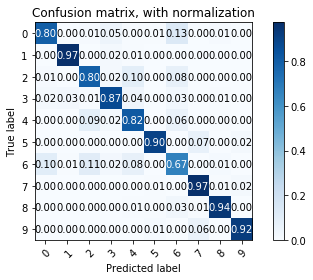

In [7]:
if __name__ == '__main__':
    x_train = np.load("data/x_train.npy")
    x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
    y_train = np.load("data/y_train.npy")

    x_test = np.load("data/x_test.npy")
    x_test = (x_test - np.mean(x_test, axis=0))/np.std(x_test, axis=0)
    y_test = np.load("data/y_test.npy")

    load_weights = False #set to True if you want to use saved weights

    if load_weights:
        w1 = np.load('w1')
        w2 = np.load('w2')
        w3 = np.load('w3')
        w4 = np.load('w4')

        b1 = np.load('b1')
        b2 = np.load('b2')
        b3 = np.load('b3')
        b4 = np.load('b4')
    else:
        w1, b1 = init_weights(784, 256)
        w2, b2 = init_weights(256, 256)
        w3, b3 = init_weights(256, 256)
        w4, b4 = init_weights(256, 10)

    time_start=time.time()
    w1, w2, w3, w4, b1, b2, b3, b4, losses = minibatch_gd(10, w1, w2, w3, w4, b1, b2, b3, b4, x_train, y_train, 10)
    time_end=time.time()
    
    np.save('w1', w1)
    np.save('w2', w2)
    np.save('w3', w3)
    np.save('w4', w4)

    np.save('b1', b1)
    np.save('b2', b2)
    np.save('b3', b3)
    np.save('b4', b4)

    avg_class_rate, class_rate_per_class, y_pred = test_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, 10)

    print(avg_class_rate, class_rate_per_class)
    print('Time:', time_end-time_start,'s')

    class_names = np.array(["0","1","2","3","4","5","6","7","8","9"])

    plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
    plt.show()


Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
0.8925 [0.884, 0.969, 0.819, 0.908, 0.887, 0.969, 0.662, 0.923, 0.957, 0.947]
Time: 99.2511339187622 s


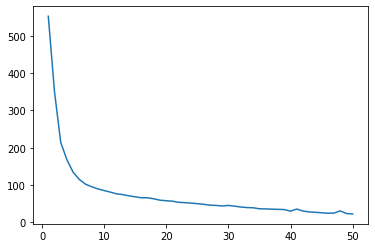

In [11]:
if __name__ == '__main__':
    x_train = np.load("data/x_train.npy")
    x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
    y_train = np.load("data/y_train.npy")

    x_test = np.load("data/x_test.npy")
    x_test = (x_test - np.mean(x_test, axis=0))/np.std(x_test, axis=0)
    y_test = np.load("data/y_test.npy")

    load_weights = False #set to True if you want to use saved weights

    if load_weights:
        w1 = np.load('w1')
        w2 = np.load('w2')
        w3 = np.load('w3')
        w4 = np.load('w4')

        b1 = np.load('b1')
        b2 = np.load('b2')
        b3 = np.load('b3')
        b4 = np.load('b4')
    else:
        w1, b1 = init_weights(784, 256)
        w2, b2 = init_weights(256, 256)
        w3, b3 = init_weights(256, 256)
        w4, b4 = init_weights(256, 10)

    time_start=time.time()
    w1, w2, w3, w4, b1, b2, b3, b4, losses = minibatch_gd(50, w1, w2, w3, w4, b1, b2, b3, b4, x_train, y_train, 10)
    time_end=time.time()
    
    np.save('w1', w1)
    np.save('w2', w2)
    np.save('w3', w3)
    np.save('w4', w4)

    np.save('b1', b1)
    np.save('b2', b2)
    np.save('b3', b3)
    np.save('b4', b4)

    avg_class_rate, class_rate_per_class, y_pred = test_nn(w1, w2, w3, w4, b1, b2, b3, b4, x_test, y_test, 10)

    print(avg_class_rate, class_rate_per_class)
    print('Time:', time_end-time_start,'s')

    class_names = np.array(["0","1","2","3","4","5","6","7","8","9"])

    x = np.arange(1,51,1)
    plt.plot(x,losses)
    plt.show()